# Importing Libraries and Loading Dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset
file_path = r"/Users/hari/Desktop/College/Machineeeeeeeeee/pcos_rotterdam_balanceado.csv"  
df = pd.read_csv(file_path)

# Analysing Dataset

In [16]:
print("Dataset Information:")
print(df.info())

# Checking missing values
print("\nMissing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Checking for duplicate entries
print("\nDuplicate Rows:", df.duplicated().sum())

# Summary statistics
print("\nSummary of the dataset:")
print(df.describe())

# Check unique values in target variable
print("\nDistribution of the target variable:")
print(df["PCOS_Diagnosis"].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        3000 non-null   int64  
 1   BMI                        3000 non-null   float64
 2   Menstrual_Irregularity     3000 non-null   int64  
 3   Testosterone_Level(ng/dL)  3000 non-null   float64
 4   Antral_Follicle_Count      3000 non-null   int64  
 5   PCOS_Diagnosis             3000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 140.8 KB
None

Missing Values:
Series([], dtype: int64)

Duplicate Rows: 0

Summary of the dataset:
               Age          BMI  Menstrual_Irregularity  \
count  3000.000000  3000.000000             3000.000000   
mean     30.052667    23.646000                0.289333   
std       7.549982     4.510006                0.453529   
min      18.000000     8.500000               

# Performing EDA

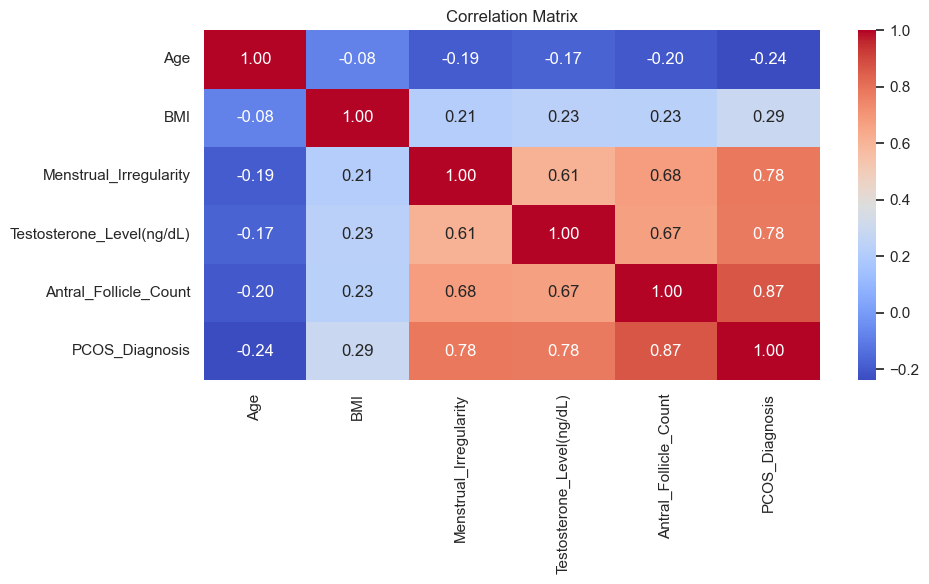

/var/folders/bd/9y68qxjj5xd_m035d74406840000gn/T/ipykernel_16045/701660275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PCOS_Diagnosis", data=df, palette="coolwarm")


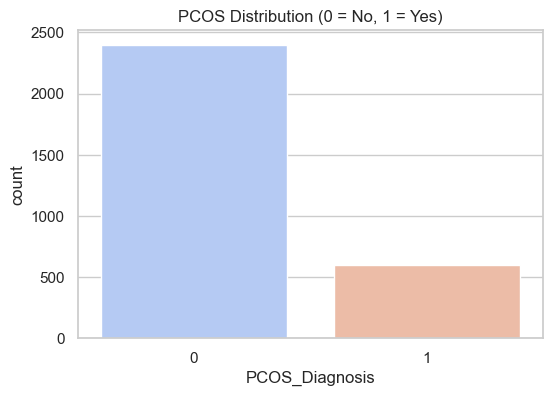

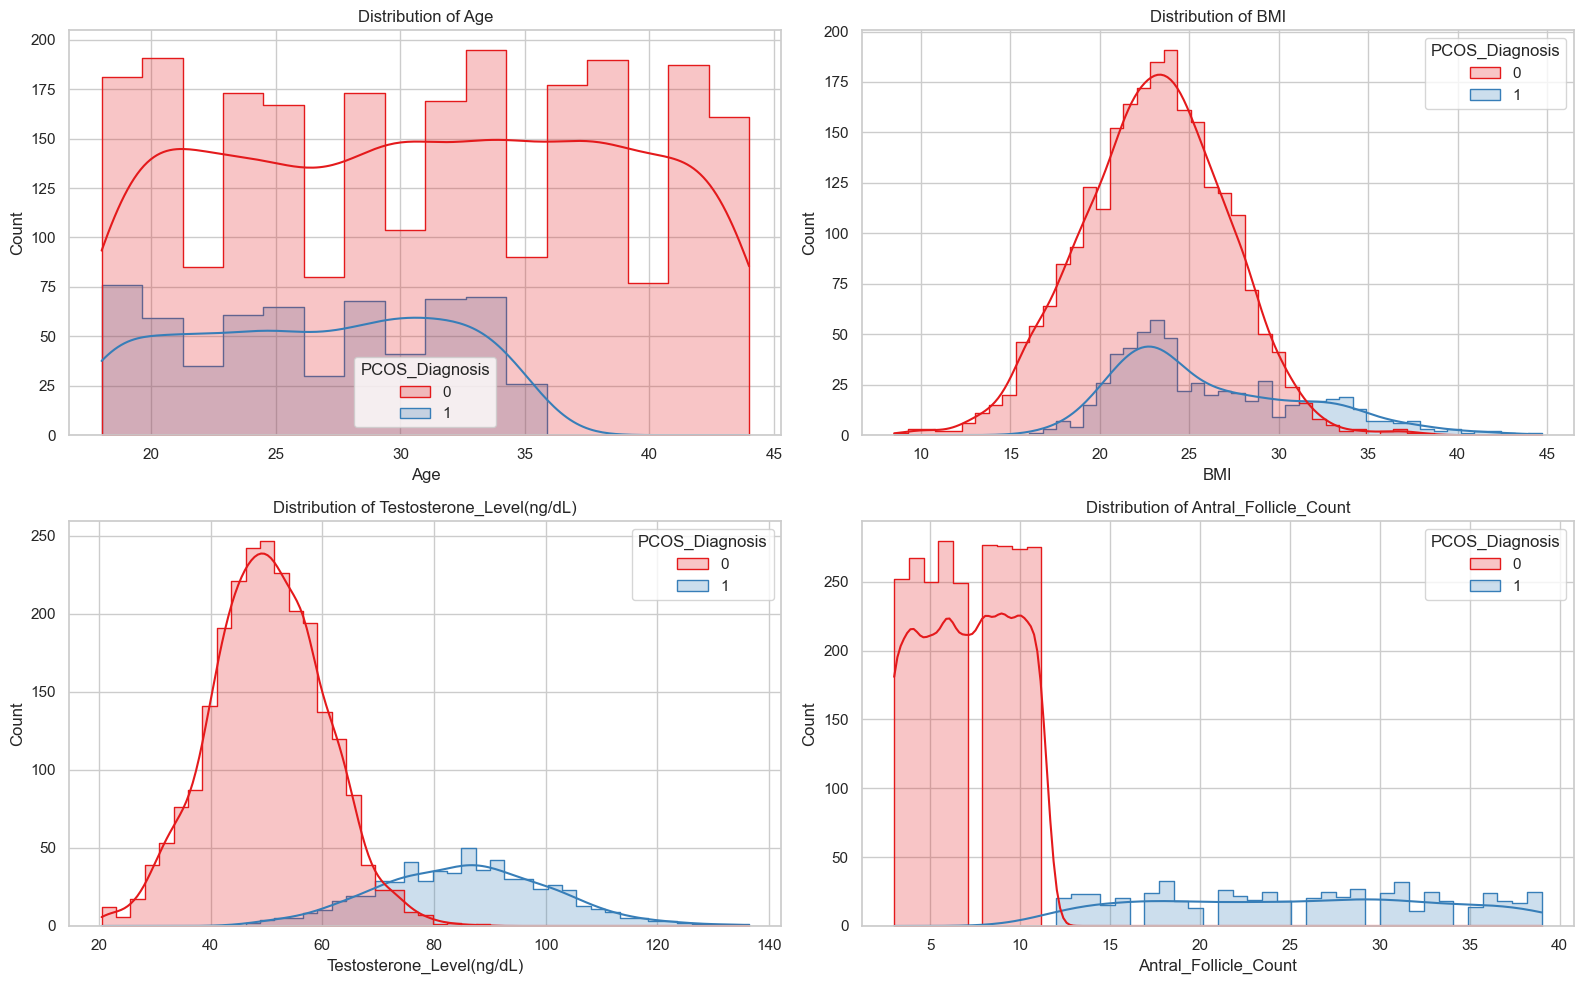

In [17]:

# Set the style
sns.set(style="whitegrid")

# --- 1. Correlation Matrix ---
plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
# Checking PCOS Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="PCOS_Diagnosis", data=df, palette="coolwarm")
plt.title("PCOS Distribution (0 = No, 1 = Yes)")
plt.show()

# --- 2. Feature Distributions by PCOS Diagnosis ---
features = ['Age', 'BMI', 'Testosterone_Level(ng/dL)', 'Antral_Follicle_Count']
plt.figure(figsize=(16, 10))

for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='PCOS_Diagnosis', kde=True, element="step", palette='Set1')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


# Analyzing results using different models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = df.drop("PCOS_Diagnosis", axis=1)
y = df["PCOS_Diagnosis"]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)  

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# Initialize models
logreg = LogisticRegression()
rf = RandomForestClassifier(random_state=42)
svc = SVC(probability=True)

# Train
Model_LogReg=logreg.fit(X_train, y_train)
Model_RF=rf.fit(X_train, y_train)
Model_SVC=svc.fit(X_train, y_train)


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       0.99      1.00      1.00       120

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



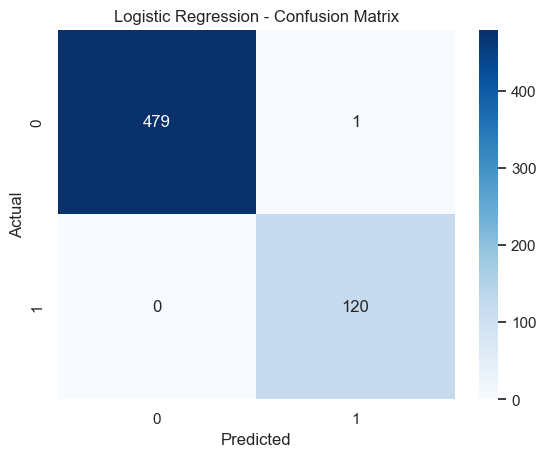


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       1.00      1.00      1.00       120

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



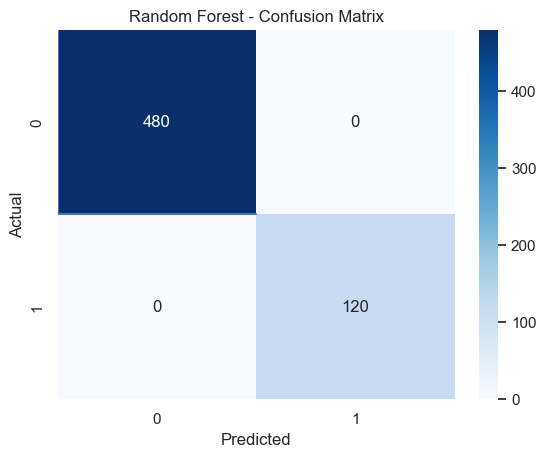


SVM Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       0.98      1.00      0.99       120

    accuracy                           1.00       600
   macro avg       0.99      1.00      0.99       600
weighted avg       1.00      1.00      1.00       600



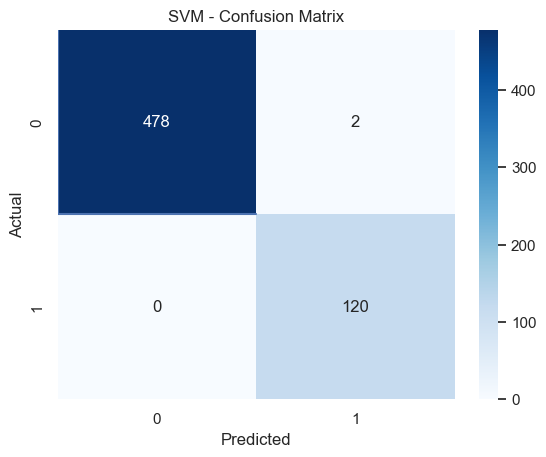

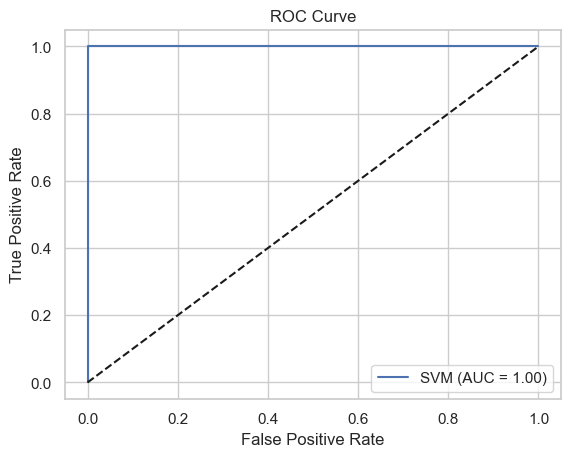

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = {'Logistic Regression': logreg, 'Random Forest': rf, 'SVM': svc}

for name, model in models.items():
    print(f"\n{name} Evaluation:")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [21]:
# After predictions

np.save('tabular_probs.npy', model.predict_proba(X_test))

np.save('labels_tabular.npy', y_test)  # Save ground truth once

 

In [22]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
 
# 🔹 Load predictions and labels
tabular_probs = np.load('tabular_probs.npy')   # shape: (N1, 2)
image_probs = np.load('image_probs.npy')       # shape: (N2, 2)
labels_tabular = np.load('labels_tabular.npy') # shape: (N1,)
labels_image = np.load('labels_image.npy')     # shape: (N2,)
 
# 🔍 Evaluate each model independently
print("🔹 Tabular Model Performance")
tabular_preds = np.argmax(tabular_probs, axis=1)
print(classification_report(labels_tabular, tabular_preds))
print("Accuracy:", accuracy_score(labels_tabular, tabular_preds))
 
print("\n🔹 Image Model Performance")
image_preds = np.argmax(image_probs, axis=1)
print(classification_report(labels_image, image_preds))
print("Accuracy:", accuracy_score(labels_image, image_preds))

🔹 Tabular Model Performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       480
           1       0.98      1.00      0.99       120

    accuracy                           1.00       600
   macro avg       0.99      1.00      0.99       600
weighted avg       1.00      1.00      1.00       600

Accuracy: 0.9966666666666667

🔹 Image Model Performance
              precision    recall  f1-score   support

           0       0.41      0.40      0.41       156
           1       0.60      0.61      0.61       228

    accuracy                           0.53       384
   macro avg       0.51      0.51      0.51       384
weighted avg       0.52      0.53      0.52       384

Accuracy: 0.5260416666666666


In [23]:
# Average class probabilities across datasets (mean prediction confidence)
avg_tabular_confidence = np.mean(tabular_probs, axis=0)  # shape: (2,)
avg_image_confidence = np.mean(image_probs, axis=0)      # shape: (2,)
 
# Weighted fusion (adjustable)
w1, w2 = 0.6, 0.4  # Example: 60% weight to tabular, 40% to image
fused_confidence = w1 * avg_tabular_confidence + w2 * avg_image_confidence
 
print("\n📊 Fused Class Confidence:")
print(f"Class 0 (Not PCOS): {fused_confidence[0]:.3f}")
print(f"Class 1 (PCOS): {fused_confidence[1]:.3f}")
 
# Final decision
fused_class = np.argmax(fused_confidence)
print("🧠 Final Ensemble Prediction:", "PCOS" if fused_class == 1 else "Not PCOS")


📊 Fused Class Confidence:
Class 0 (Not PCOS): 0.636
Class 1 (PCOS): 0.364
🧠 Final Ensemble Prediction: Not PCOS


In [24]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
 
# Example: assuming your model variable is named 'model'
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", rf)
])
 
pipeline.fit(X_train, y_train)  # Use your actual training data
 
with open("tabular_model.pkl", "wb") as f:
    pickle.dump(pipeline, f)